In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline
from keras.datasets import fashion_mnist

(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data() 

In [2]:
tf.__version__

'2.7.0'

In [3]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


In [5]:
# Find the unique numbers (classes) from the train labels
classes = np.unique(train_Y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground Truth : 9')

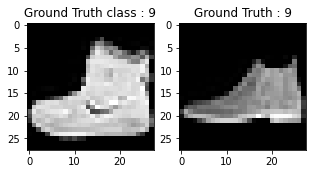

In [6]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth class : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

# Data Preprocessing 

In [7]:
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)
train_X.shape,  test_X.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [8]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255. #rescale pixel values in range 0-1

In [9]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 9
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [10]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [11]:
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

# Building Network

In [12]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [13]:
batch_size = 64
epochs = 20
num_classes = 10

Note to self: 
- 1 epoch = one forward pass and one backward pass of all the training examples
- batch size = the number of training examples in one forward/backward pass. The higher the batch size, the more memory space you'll need.
- number of iterations = number of passes, each pass using [batch size] number of examples. To be clear, one pass = one forward pass + one backward pass (we do not count the forward pass and backward pass as two different passes).

Example: if you have 1000 training examples, and your batch size is 500, then it will take 2 iterations to complete 1 epoch.

In [14]:
from tensorflow.keras import layers
fashion_model = Sequential(
    [
        layers.Conv2D(32, kernel_size=(3,3), activation='linear', input_shape=(28,28,1), padding='same'), 
        layers.LeakyReLU(alpha=0.1), 
        layers.MaxPooling2D((2, 2), padding='same'), 
        layers.Conv2D(64, (3, 3), activation='linear',padding='same'), 
        layers.LeakyReLU(alpha=0.1), 
        layers.MaxPooling2D(pool_size=(2, 2),padding='same'),
        layers.Conv2D(128, (3, 3), activation='linear',padding='same'),
        layers.LeakyReLU(alpha=0.1),
        layers.MaxPooling2D(pool_size=(2, 2),padding='same'),
        layers.Flatten(),
        layers.Dense(128, activation='linear'), 
        layers.LeakyReLU(alpha=0.1),
        layers.Dense(num_classes, activation='softmax'), 
    ]
)

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-01-15 16:15:26.993214: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-01-15 16:15:26.993364: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [15]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

In [16]:
fashion_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                    

In [17]:
fashion_train = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=0)

2022-01-15 16:15:39.890550: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-01-15 16:15:40.032837: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 1/20
746/750 [============================>.] - ETA: 0s - loss: 0.4677 - accuracy: 0.8298

2022-01-15 16:15:48.988926: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


750/750 [==============================] - 10s 13ms/step - loss: 0.4676 - accuracy: 0.8300 - val_loss: 0.3273 - val_accuracy: 0.8796
Epoch 2/20
750/750 [==============================] - 10s 13ms/step - loss: 0.2875 - accuracy: 0.8957 - val_loss: 0.3006 - val_accuracy: 0.8903
Epoch 3/20
750/750 [==============================] - 10s 13ms/step - loss: 0.2412 - accuracy: 0.9111 - val_loss: 0.2468 - val_accuracy: 0.9112
Epoch 4/20
750/750 [==============================] - 10s 13ms/step - loss: 0.2082 - accuracy: 0.9238 - val_loss: 0.2463 - val_accuracy: 0.9109
Epoch 5/20
750/750 [==============================] - 10s 13ms/step - loss: 0.1832 - accuracy: 0.9323 - val_loss: 0.2375 - val_accuracy: 0.9128
Epoch 6/20
750/750 [==============================] - 10s 13ms/step - loss: 0.1600 - accuracy: 0.9395 - val_loss: 0.2196 - val_accuracy: 0.9220
Epoch 7/20
750/750 [==============================] - 10s 13ms/step - loss: 0.1371 - accuracy: 0.9490 - val_loss: 0.2384 - val_accuracy: 0.9217
Epo

In [18]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.4632566273212433
Test accuracy: 0.9202000498771667


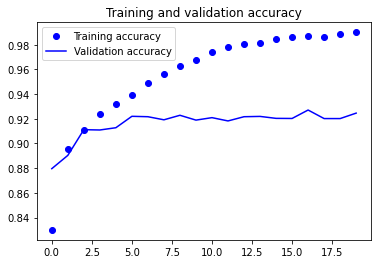

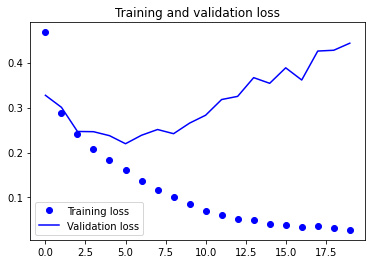

In [19]:
accuracy = fashion_train.history['accuracy']
val_accuracy = fashion_train.history['val_accuracy']
loss = fashion_train.history['loss']
val_loss = fashion_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

From the above two plots, you can see that the validation accuracy almost became stagnant after 4-5 epochs and rarely increased at certain epochs. In the beginning, the validation accuracy was linearly increasing with loss, but then it did not increase much.

The validation loss shows that this is the sign of overfitting, similar to validation accuracy it linearly decreased but after 4-5 epochs, it started to increase. This means that the model tried to memorize the data and succeeded.

In [20]:
# Adding Dropout version
batch_size = 64
epochs = 20
num_classes = 10

In [23]:
fashion_model_dropout = Sequential(
    [
        layers.Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(28,28,1)), 
        layers.LeakyReLU(alpha=0.1),
        layers.MaxPooling2D((2, 2),padding='same'),
        layers.Dropout(0.25), 
        layers.Conv2D(64, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(28,28,1)), 
        layers.LeakyReLU(alpha=0.1),
        layers.MaxPooling2D((2, 2),padding='same'),
        layers.Dropout(0.25), 
        layers.Conv2D(128, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(28,28,1)), 
        layers.LeakyReLU(alpha=0.1),
        layers.MaxPooling2D((2, 2),padding='same'),
        layers.Dropout(0.4), 
        layers.Flatten(),
        layers.Dense(128, activation='linear'), 
        layers.LeakyReLU(alpha=0.1),
        layers.Dropout(0.3), 
        layers.Dense(num_classes, activation='softmax'), 
    ]
)

In [24]:
fashion_model_dropout.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu_12 (LeakyReLU)  (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_13 (LeakyReLU)  (None, 14, 14, 64)        0         
                                                      

In [25]:
fashion_model_dropout.compile(loss=keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

In [26]:
fashion_train_dropout = fashion_model_dropout.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/20
  1/750 [..............................] - ETA: 3:31 - loss: 2.2954 - accuracy: 0.1250

2022-01-15 16:37:04.099861: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


750/750 [==============================] - ETA: 0s - loss: 0.5932 - accuracy: 0.7791

2022-01-15 16:37:13.957476: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


750/750 [==============================] - 11s 15ms/step - loss: 0.5932 - accuracy: 0.7791 - val_loss: 0.3620 - val_accuracy: 0.8678
Epoch 2/20
750/750 [==============================] - 10s 14ms/step - loss: 0.3759 - accuracy: 0.8613 - val_loss: 0.3040 - val_accuracy: 0.8890
Epoch 3/20
750/750 [==============================] - 10s 14ms/step - loss: 0.3292 - accuracy: 0.8784 - val_loss: 0.2873 - val_accuracy: 0.8927
Epoch 4/20
750/750 [==============================] - 11s 14ms/step - loss: 0.2999 - accuracy: 0.8874 - val_loss: 0.2672 - val_accuracy: 0.9017
Epoch 5/20
750/750 [==============================] - 11s 14ms/step - loss: 0.2828 - accuracy: 0.8953 - val_loss: 0.2517 - val_accuracy: 0.9045
Epoch 6/20
750/750 [==============================] - 10s 14ms/step - loss: 0.2670 - accuracy: 0.8987 - val_loss: 0.2363 - val_accuracy: 0.9119
Epoch 7/20
750/750 [==============================] - 10s 14ms/step - loss: 0.2614 - accuracy: 0.9026 - val_loss: 0.2274 - val_accuracy: 0.9162
Epo

In [27]:
fashion_model_dropout.save("fashion_model_dropout.h5py")

2022-01-15 16:40:50.876507: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: fashion_model_dropout.h5py/assets


In [28]:
test_eval = fashion_model_dropout.evaluate(test_X, test_Y_one_hot, verbose=1)

313/313 [==============================] - 2s 6ms/step - loss: 0.2252 - accuracy: 0.9207


In [29]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.225224569439888
Test accuracy: 0.9207000732421875


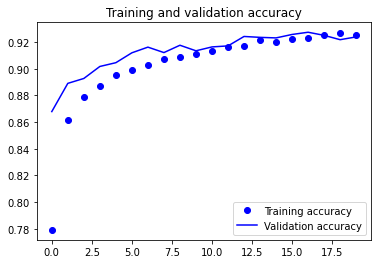

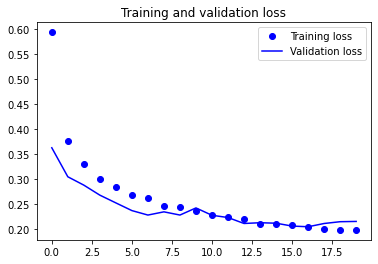

In [30]:
accuracy = fashion_train_dropout.history['accuracy']
val_accuracy = fashion_train_dropout.history['val_accuracy']
loss = fashion_train_dropout.history['loss']
val_loss = fashion_train_dropout.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Finally, you can see that the validation loss and validation accuracy both are in sync with the training loss and training accuracy. Even though the validation loss and accuracy line are not linear, but it shows that your model is not overfitting: the validation loss is decreasing and not increasing, and there is not much gap between training and validation accuracy.

# Predict Labels

In [31]:
predicted_classes = fashion_model.predict(test_X)

2022-01-15 16:41:24.962513: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [32]:
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)

In [33]:
predicted_classes.shape, test_Y.shape

((10000,), (10000,))

Found 1000 correct labels


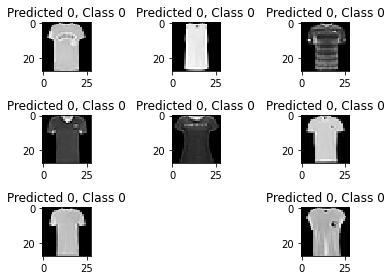

In [34]:
correct = np.where(predicted_classes==test_Y)[0]
print ("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], test_Y[correct]))
    plt.tight_layout()

Found 9000 incorrect labels


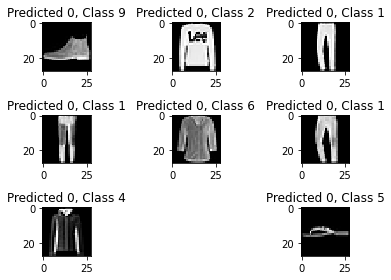

In [35]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print ("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], test_Y[incorrect]))
    plt.tight_layout()

In [36]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.10      1.00      0.18      1000
     Class 1       0.00      0.00      0.00      1000
     Class 2       0.00      0.00      0.00      1000
     Class 3       0.00      0.00      0.00      1000
     Class 4       0.00      0.00      0.00      1000
     Class 5       0.00      0.00      0.00      1000
     Class 6       0.00      0.00      0.00      1000
     Class 7       0.00      0.00      0.00      1000
     Class 8       0.00      0.00      0.00      1000
     Class 9       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000

